In [2]:
import psycopg2
import pandas as pd
import psycopg2.extras

In [3]:
# !pip install pandas

In [4]:
import pandas as pd

In [5]:
import psycopg2
import pandas as pd
import psycopg2.extras

In [6]:
# !pip install psycopg2

In [7]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database = "postgres",
                                          user = "postgres",
                                          password = "saffat",
                                          host = "127.0.0.1",
                                          port = "5432")
    def getConnection(self):
        print("Successfully connected to database")
        return self.connection

In [8]:
con = PostgresConnection().getConnection()

Successfully connected to database


In [9]:
# !pip install psycopg2

# Data Extraction

In [11]:
trans_dim = pd.read_excel(r'C:/Users/mimsr/Desktop/e_commerce_system/e_commerce_system/Scripts/e-commerece_data.xlsx',sheet_name = 'Trans_dim',engine = 'openpyxl')

In [12]:
!pip install openpyxl


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
trans_dim

,payment_key,trans_type,bank_name
0,P001,cash,NaN
1,P002,card,AB Bank Limited
2,P003,card,Bangladesh Commerce Bank Limited
3,P004,card,Bank Asia Limited
4,P005,card,BRAC Bank Limited
5,P006,card,Citizens Bank Limited
6,P007,card,City Bank Limited
7,P008,card,Community Bank Bangladesh Limited
8,P009,card,Dhaka Bank Limited
9,P010,card,Dutch-Bangla Bank Limited


# Load

In [13]:
con = PostgresConnection().getConnection()
insert_stmt='''INSERT INTO ecomdb.trans_dim(payment_key, trans_type,bank_name)
               VALUES (%s, %s, %s)'''
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, trans_dim.values)
con.commit()
cur.close()

Successfully connected to database


UniqueViolation: duplicate key value violates unique constraint "pk_1"
DETAIL:  Key (payment_key)=(P001) already exists.


In [ ]:
item_dim = pd.read_excel(r'C:/Users/mimsr/Desktop/e_commerce_system/e_commerce_system/Scripts/e-commerece_data.xlsx',sheet_name = 'Item_dim',engine = 'openpyxl')

In [ ]:
item_dim

In [ ]:
con = PostgresConnection().getConnection()
insert_stmt='''INSERT INTO ecomdb.item_dim(item_key, item_name, _desc, unit_price, man_country, supplier, unit)
               VALUES (%s, %s, %s, %s, %s, %s, %s)'''
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, item_dim.values)
con.commit()
cur.close()

In [30]:
coustomer_dim = pd.read_excel(r'C:/Users/mimsr/Desktop/e_commerce_system/e_commerce_system/Scripts/e-commerece_data.xlsx',sheet_name = 'Coustomer_dim',engine = 'openpyxl')

In [32]:
coustomer_dim

,coustomer_key,name,contact_no,nid
0,C000001,sumit,8801920345851,7505075708899
1,C000002,tammanne,8801817069329,1977731324842
2,C000003,kailash kumar,8801663795774,3769494056318
3,C000004,bhagwati prasad,8801533627961,9378834712725
4,C000005,ajay,8801943715786,3540815556323
...,...,...,...,...
9186,C009187,smt radha,8801563029753,1057824928189
9187,C009188,tulsi sharma,8801794982266,7970880905205
9188,C009189,madhubala,8801890032435,3101930298150
9189,C009190,pintu devi,8801563290767,7234328323528


In [40]:
con = PostgresConnection().getConnection()
insert_stmt='''INSERT INTO ecomdb.coustomer_dim(coustomer_key, name, contact_no, nid)
               VALUES (%s, %s, %s, %s)'''
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, coustomer_dim.values)
con.commit()
cur.close()

Successfully connected to database


In [16]:
time_dim = pd.read_excel(r'C:/Users/mimsr/Desktop/e_commerce_system/e_commerce_system/Scripts/e-commerece_data.xlsx',sheet_name = 'Time_dim',engine = 'openpyxl')

In [17]:
time_dim['date'].dtype

dtype('O')

In [18]:
con = PostgresConnection().getConnection()
insert_stmt='''INSERT INTO ecomdb.time_dim(time_key, date, hour, day, week, month, quarter, year)
               VALUES (%s, %s, %s, %s, %s, %s, %s, %s)'''
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, time_dim.values)
con.commit()
cur.close()

Successfully connected to database


DatetimeFieldOverflow: date/time field value out of range: "20-05-2017 14:56"
LINE 2:                VALUES ('T00001', '20-05-2017 14:56', 14, 20,...
                                         ^
HINT:  Perhaps you need a different "datestyle" setting.


# Transformation

In [19]:
time_dim['date'] = pd.to_datetime(time_dim['date'], format='%d-%m-%Y %H:%M').dt.tz_localize('UTC')

# Load

In [25]:
store_dim = pd.read_excel(r'C:/Users/mimsr/Desktop/e_commerce_system/e_commerce_system/Scripts/e-commerece_data.xlsx',sheet_name = 'Store_dim',engine = 'openpyxl')

In [26]:
store_dim

,store_key,division,district,upazila
0,S0001,SYLHET,HABIGANJ,AJMIRIGANJ
1,S0002,SYLHET,HABIGANJ,BAHUBAL
2,S0003,SYLHET,HABIGANJ,BANIACHONG
3,S0004,SYLHET,HABIGANJ,CHUNARUGHAT
4,S0005,SYLHET,HABIGANJ,HABIGANJ SADAR
...,...,...,...,...
721,S00722,BARISAL,BARISAL,HIZLA
722,S00723,BARISAL,BARISAL,BARISAL SADAR (KOTWALI)
723,S00724,BARISAL,BARISAL,MEHENDIGANJ
724,S00725,BARISAL,BARISAL,MULADI


In [27]:
con = PostgresConnection().getConnection()
insert_stmt='''INSERT INTO ecomdb.store_dim(store_key, division, district, upazila)
               VALUES (%s, %s, %s, %s)'''
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, store_dim.values)
con.commit()
cur.close()

Successfully connected to database


In [28]:
fact_table = pd.read_excel(r'C:/Users/mimsr/Desktop/e_commerce_system/e_commerce_system/Scripts/e-commerece_data.xlsx',sheet_name = 'Fact_table',engine = 'openpyxl')

In [29]:
fact_table

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0
...,...,...,...,...,...,...,...,...,...
999995,P010,C003726,T09247,I00063,S00502,5,cans,40.0,200.0
999996,P021,C002581,T023483,I00252,S00225,1,ct,11.0,11.0
999997,P035,C006133,T039372,I00119,S00555,7,ct,53.0,371.0
999998,P031,C008735,T097975,I00257,S00440,2,ct,21.0,42.0


In [31]:
con = PostgresConnection().getConnection()
insert_stmt='''INSERT INTO ecomdb.fact_table(payment_key, coustomer_key, time_key, item_key, store_key, quantity, unit, unit_price, total_price)
               VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)'''
cur = con.cursor()
psycopg2.extras.execute_batch(cur, insert_stmt, fact_table.values)
con.commit()
cur.close()

Successfully connected to database


# OlAP Query

In [11]:
cur = con.cursor()
select_query = '''select s.division, sum(f.total_price)
from ecomdb.fact_table f 
join ecomdb.store_dim s on s.store_key = f.store_key 
group by (s.division)
order by s.division'''
cur.execute(select_query)
records = cur.fetchall()
records

[('BARISAL', 7520343.75),
 ('CHITTAGONG', 19763595.0),
 ('DHAKA', 40764619.75),
 ('KHULNA', 11311610.5),
 ('RAJSHAHI', 12099196.0),
 ('RANGPUR', 8429836.5),
 ('SYLHET', 5512234.25)]

In [12]:
query_1 = pd.DataFrame(list(records),columns = ['division','total_price'])
query_1

,division,total_price
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


Matplotlib is building the font cache; this may take a moment.


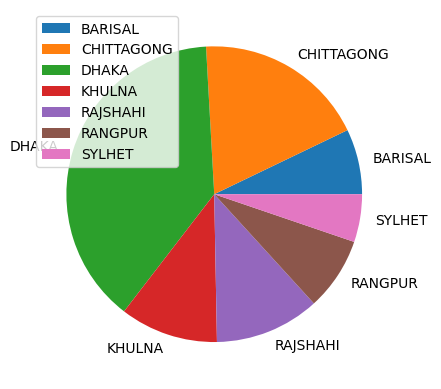

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.pie(query_1.total_price, labels = query_1.division)
# plt.pie(query_1.total_price,query_1.division)
plt.legend()
plt.show()

In [14]:
!pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 241.9 kB/s eta 0:00:00
     ------------------------------------ 163.0/163.0 kB 576.3 kB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 761.3 kB/s eta 0:00:00
     -------------------------------------- 55.4/55.4 kB 222.4 kB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 419.1 kB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 1.9 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
cur = con.cursor()
select_query = '''select s.district, sum(f.total_price)
from ecomdb.fact_table f 
join ecomdb.store_dim s on s.store_key = f.store_key 
group by (s.district)
order by s.district'''
cur.execute(select_query)
records = cur.fetchall()
records

[('BAGERHAT', 1307651.0),
 ('BANDARBAN', 995360.75),
 ('BARGUNA', 869041.0),
 ('BARISAL', 2897237.75),
 ('BHOLA', 1012205.75),
 ('BOGRA', 1716452.75),
 ('BRAHMANBARIA', 1328234.25),
 ('CHANDPUR', 1153276.75),
 ('CHAPAI NABABGANJ', 739447.5),
 ('CHITTAGONG', 7292985.5),
 ('CHUADANGA', 563909.75),
 ('COMILLA', 2286898.25),
 ("COX'S BAZAR", 1188128.75),
 ('DHAKA', 23597621.0),
 ('DINAJPUR', 1871005.75),
 ('FARIDPUR', 1287383.75),
 ('FENI', 847873.5),
 ('GAIBANDHA', 997077.75),
 ('GAZIPUR', 722286.25),
 ('GOPALGANJ', 731312.75),
 ('HABIGANJ', 1153998.0),
 ('JAMALPUR', 1009760.0),
 ('JESSORE', 1132590.5),
 ('JHALOKATI', 570807.25),
 ('JHENAIDAH', 869991.25),
 ('JOYPURHAT', 735378.5),
 ('KHAGRACHHARI', 1161721.5),
 ('KHULNA', 4081283.75),
 ('KISHOREGONJ', 1895395.5),
 ('KURIGRAM', 1327257.0),
 ('KUSHTIA', 871240.5),
 ('LAKSHMIPUR', 729909.25),
 ('LALMONIRHAT', 732387.0),
 ('MADARIPUR', 601530.5),
 ('MAGURA', 577543.25),
 ('MANIKGANJ', 997970.0),
 ('MAULVIBAZAR', 1036745.0),
 ('MEHERPUR', 436

In [11]:
query_1 = pd.DataFrame(list(records),columns = ['district','total_price'])
query_1

,district,total_price
0,BAGERHAT,1307651.00
1,BANDARBAN,995360.75
2,BARGUNA,869041.00
3,BARISAL,2897237.75
4,BHOLA,1012205.75
...,...,...
59,SIRAJGANJ,1295100.75
60,SUNAMGANJ,1593774.00
61,SYLHET,1727717.25
62,TANGAIL,1774650.25


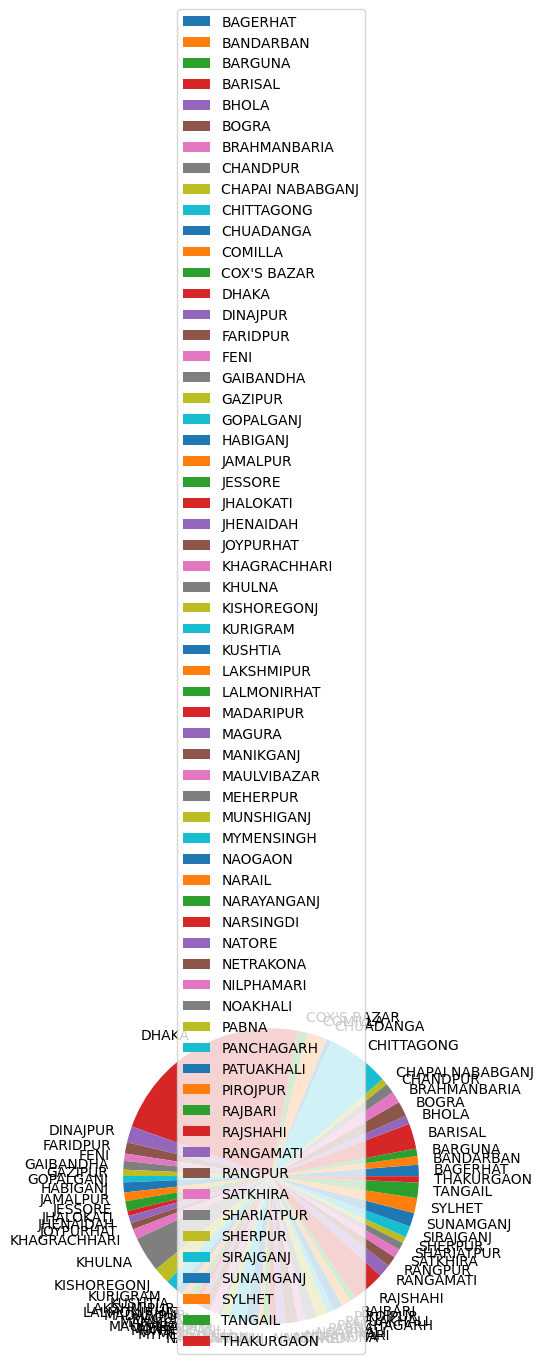

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.pie(query_1.total_price, labels = query_1.district)
# plt.pie(query_1.total_price,query_1.district)
plt.legend()
plt.show()

In [20]:
cur = con.cursor()
select_query = '''select s.customer, sum(f.total_price)
from ecomdb.fact_table f 
join ecomdb.customer_dim s on s.customer_key = f.customer_key 
group by (s.customer)
order by s.customer'''
cur.execute(select_query)
records = cur.fetchall()
records

InFailedSqlTransaction: current transaction is aborted, commands ignored until end of transaction block
